<a href="https://colab.research.google.com/github/Shayan-1947/ML-projects/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r"/content/Salary_Data.csv")

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.shape

(30, 2)

In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
x=df.iloc[:,:-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y=df.iloc[:,-1]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

Text(0.5, 1.0, 'Distribution of salary\xa0vs\xa0experience')

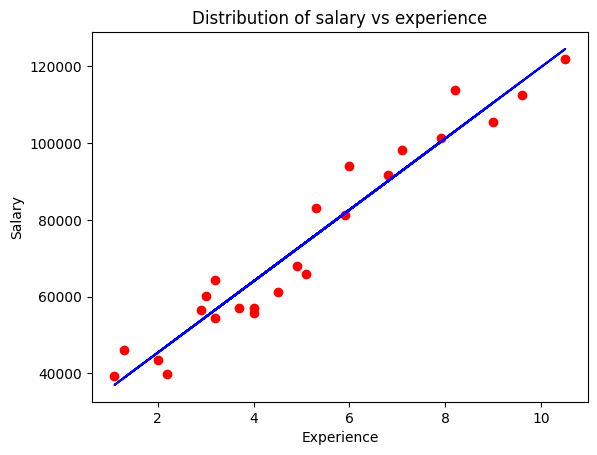

In [ ]:
#Training data
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train), color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Distribution of salary vs experience')

Text(0.5, 1.0, 'Distribution of salary\xa0vs\xa0experience')

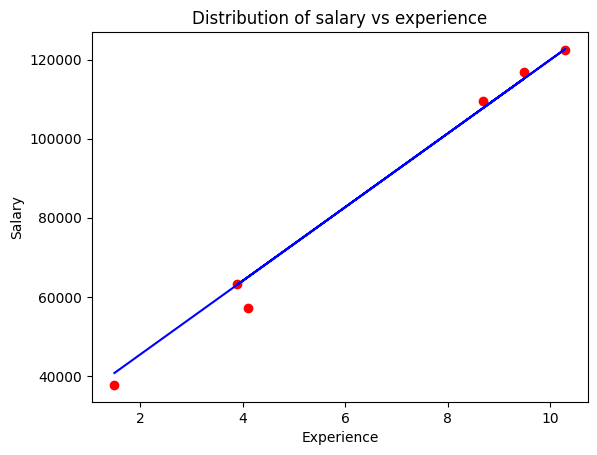

In [ ]:
#Testing data
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,model.predict(x_test), color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Distribution of salary vs experience')

In [ ]:
c=model.coef_
c

array([9312.57512673])

In [ ]:
m=model.intercept_
m

26780.09915062818

In [ ]:
#Prediction for user values
model.predict([[17]])

array([185093.87630502])

In [ ]:
#MSE: Mean Squaared Error(MSE)
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

12823412.298126549

In [ ]:
import statsmodels.api as sm
x_stats=sm.add_constant(x_train)
summ=sm.OLS(y_train,x_stats).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           5.03e-15
Time:                        03:32:17   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.678e+04   2818.687      9.501      0.000    2.09e+04    3.26e+04
x1          9312.5751    496.279     18.765      0.000    8283.355    1.03e+04
==============================================================================
Omnibus:                        3.105   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.567
Skew:                           0.297   Prob(JB):                        0.457
Kurtosis:                       1.898   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""